In [ ]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer

from treemind import Explainer
from treemind.plot import (
    feature_plot,
    interaction_plot,
    interaction_scatter_plot,
    importance_plot,
)


In [13]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

model = LGBMClassifier(verbose=-1, is_unbalance=True)
model.fit(X, y)

y_predict = model.predict(X, raw_score=True)

In [15]:
explainer = Explainer(model)

In [17]:
explainer.count_node(degree=1).head()

,column1_index,count
0,21,1587
1,27,1448
2,23,1367
3,22,1358
4,1,1071


In [18]:
explainer.count_node(degree=2).head()

,column1_index,column2_index,count
0,21,22,830
1,21,23,808
2,23,27,759
3,21,27,741
4,1,27,707


In [19]:
result_1d = explainer.explain(degree=1)
result_2d = explainer.explain(degree=2)

Analyzing features: 100%|██████████| 435/435 [00:04<00:00, 88.59it/s] 


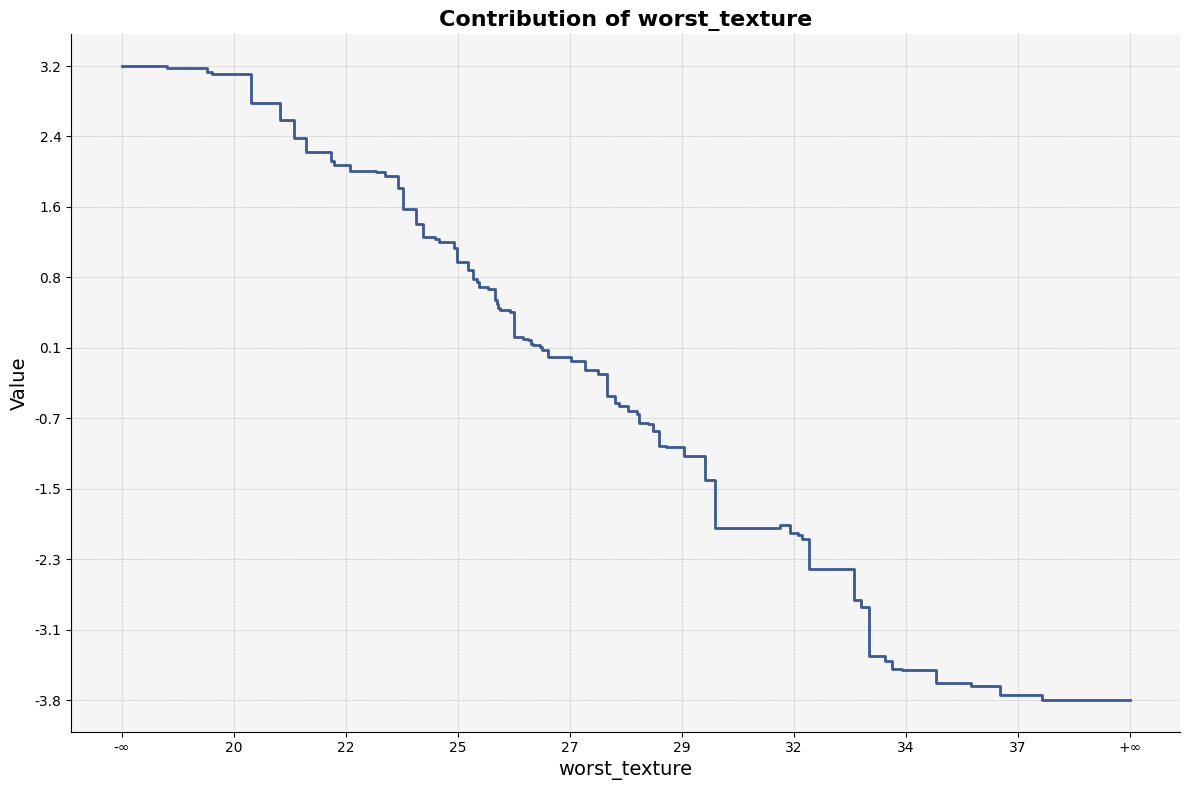

In [ ]:
feature_plot(result_1d, 21)

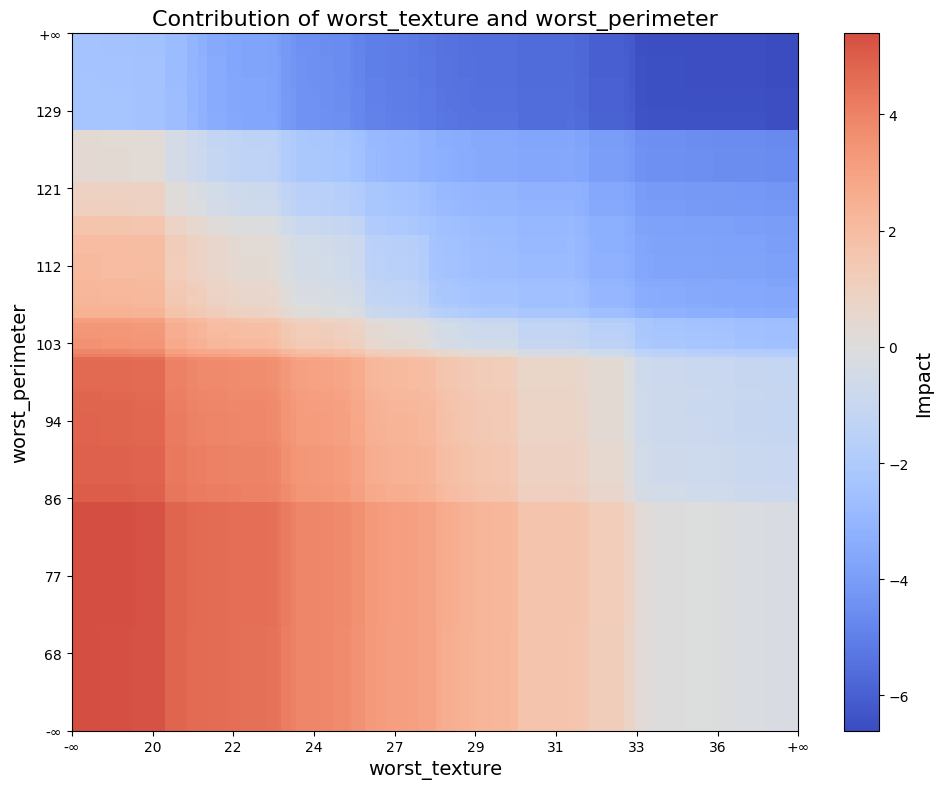

In [25]:
interaction_plot(result_2d, (21, 22))

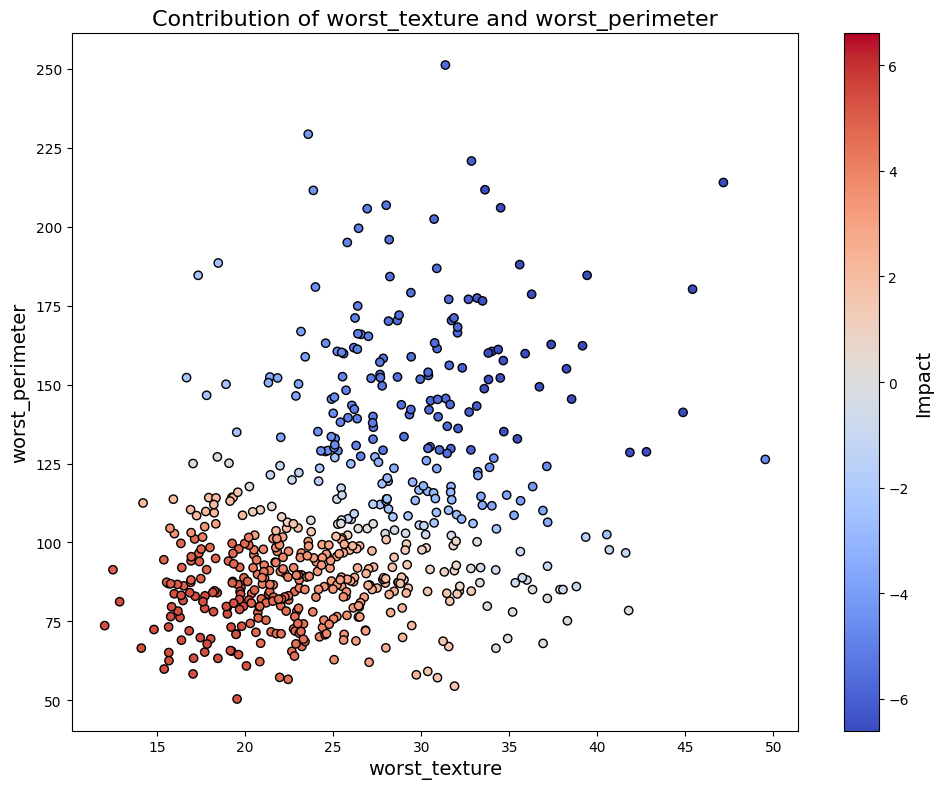

In [26]:
interaction_scatter_plot(X, result_2d, (21, 22))

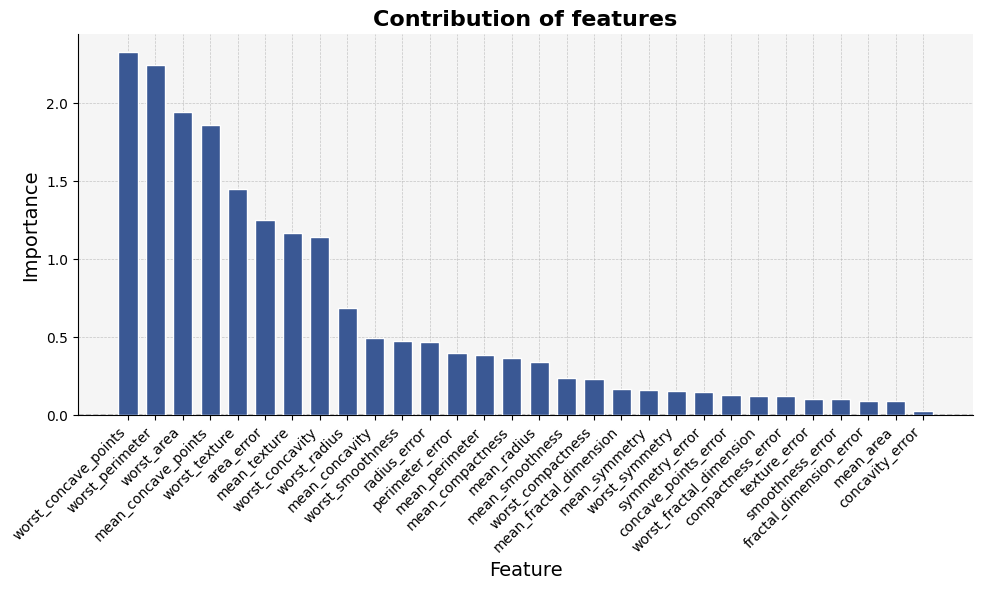

In [32]:
importance_plot(result_1d)

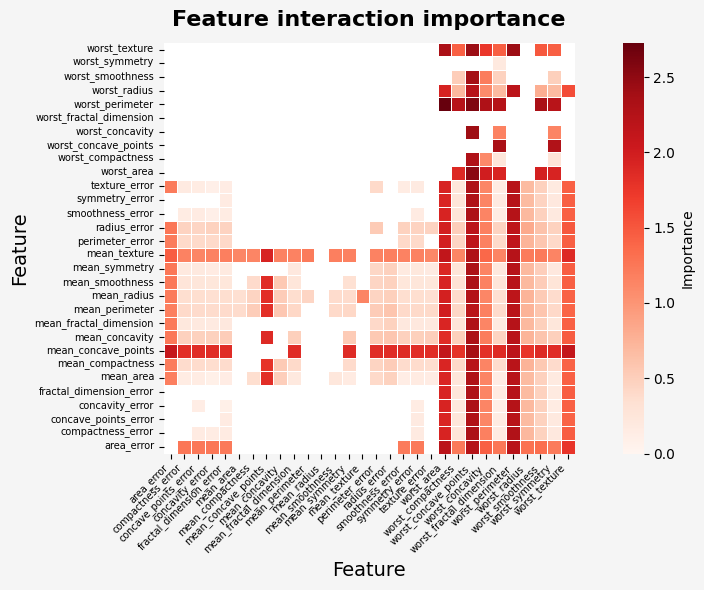

In [ ]:
importance_plot(result_2d, ticks_fontsize=7)